Загрузим пакеты для работы

In [118]:
import numpy as np
import pandas as pd

import requests
from urllib.parse import urlencode

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Загрузим данные через API Yandex

In [2]:
#функция для загрузки данных 
def down_data(pulic_key, sep = ';'):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    data_url = pulic_key
    final_url = base_url + urlencode(dict(public_key = data_url))
    # Делаем запрос через requests и вытягивыем нужную информацию
    response = requests.get(final_url)
    download_url = response.json()['href']
 # Считываем информацию
    data = pd.read_csv(download_url, sep = sep) 
    return data

In [9]:
df_url = 'https://disk.yandex.ru/d/CZQrHytWhC1KiA'
df = down_data(df_url)

Посмотрим, какие данные у нас лежат в датасете

In [10]:
df.head()

,indicator_section,indicator_name,indicator_unit,indicator_code,object_name,object_level,object_oktmo,object_okato,year,indicator_value,comment,source,reason_na
0,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Российская Федерация,страна,0,0,2022,1168076,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,NaN
1,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Свердловская область,регион,65000000,65000000,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
2,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Москва,регион,45000000,45000000,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
3,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Санкт-Петербург,регион,40000000,40000000,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
4,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Y904000001,Самарская область,регион,36000000,36000000,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...


## Описание данных для работы

- **indicator_section** Наименование раздела с показателями 
- **indicator_name**    Наименование показателя
- **indicator_unit**    Единица измерения показателя
- **indicator_code**    Код показателя 
- **object_name**       Наименование региона
- **оbject_level**      Наименование уровня географического деления (регион, федеральный округ, страна)
- **object_oktmo**      Код ОКТМО
- **object_okato**      Код ОКАТО
- **year**              Год, за который приводится значение показателя
- **indicator_value** Значение показателя. Пропущенные значения обозначаются «NA», причины пропусков приведены в колонке reason_na.
- **comment**          Комментарий по расчету индикаторов
- **source**           Источник данных
- **reason_na**        Причина пропущенных значений

У нас есть несколько колонок с информацией, которая не нужна для анализа. В первую очередь это три колонки с разными кодами, их  мы удалим.

In [11]:
df = df.drop(columns=['indicator_code', 'object_oktmo', 'object_okato'])

In [12]:
df.head()

,indicator_section,indicator_name,indicator_unit,object_name,object_level,year,indicator_value,comment,source,reason_na
0,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Российская Федерация,страна,2022,1168076,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,NaN
1,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Свердловская область,регион,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
2,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Москва,регион,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
3,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Санкт-Петербург,регион,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...
4,Масштаб,"Численность людей, живущих с ВИЧ (ЛЖВ)",человек,Самарская область,регион,2022,NaN,"Количество людей, живущих с установленным диаг...",Роспотребнадзор,отсутствовали данные в источнике или отдельно ...


Также нам не нужна информация о том, как рассчитывались индикаторы, причинах пропуска значений 

In [13]:
df = df.drop(columns=['comment', 'reason_na'])

теперь посмотрим, какие данные у нас есть - их количество и тип данных

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26244 entries, 0 to 26243
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   indicator_section  26244 non-null  object
 1   indicator_name     26244 non-null  object
 2   indicator_unit     26244 non-null  object
 3   object_name        26244 non-null  object
 4   object_level       26244 non-null  object
 5   year               26244 non-null  int64 
 6   indicator_value    19299 non-null  object
 7   source             26244 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


всего у нас есть 26 244 записи в датасете, только в колонке "indicator_value" есть пропущенные значения - 6 945

Посмотрим на статистику датасета - за какие года у нас есть наблюдения, по каким регионам и какие индикаторы 

In [27]:
df_years = df.query('object_level == "регион"') \
             .groupby(['year','object_name', 'indicator_name'], as_index=False) \
             .agg({'indicator_value':'count'}) \
             .rename(columns={'indicator_value':'sum_value'})
df_years

,year,object_name,indicator_name,sum_value
0,2014,Алтайский край,Родилось живыми детей от ВИЧ+ матерей,0
1,2014,Алтайский край,Выявлено за год (всего),4
2,2014,Алтайский край,Выявлено новых случаев ВИЧ на 100 тысяч обслед...,2
3,2014,Алтайский край,Выявлено новых случаев ВИЧ среди женщин,0
4,2014,Алтайский край,Выявлено новых случаев ВИЧ среди мужчин,0
...,...,...,...,...
20578,2022,Ярославская область,"Численность людей, обследованных на антитела к...",1
20579,2022,Ярославская область,"Число беременных женщин, у которых выявлены ан...",1
20580,2022,Ярославская область,"Число обследованных на ВИЧ беременных женщин, ...",1
20581,2022,Ярославская область,"Число пациентов, получавших антиретровирусную ...",1


такой подход не подошел, посмотрим отдельно года, регионы и индикаторы

In [28]:
years = df_years.groupby('year', as_index=False) \
                .agg({'object_name':'nunique'})
years

,year,object_name
0,2014,88
1,2015,88
2,2016,88
3,2017,88
4,2018,88
5,2019,89
6,2020,88
7,2021,88
8,2022,88


In [117]:
regions = df_years.groupby('object_name', as_index=False) \
                .agg({'year':'nunique', 'indicator_name':'nunique'}) \
                .sort_values('year')
regions

,object_name,year,indicator_name
66,Санкт-Петербург,1,1
63,Рязанская область,9,27
62,Ростовская область,9,27
61,Республика Хакасия,9,27
60,Республика Тыва,9,27
...,...,...,...
25,Курганская область,9,27
24,Красноярский край,9,27
23,Краснодарский край,9,27
43,Псковская область,9,27


У нас есть данные за период 2014-2022 года по 88 регионам России и 27 показателям, и также данные по Санкт-Петербургу за 1 год и только за 1 показатель. Оставим данные только по 88 регионам для определения динамики по разным показателям из полного датасета df.

In [30]:
regions_df = df.query('object_level == "регион" & object_name != "Санкт-Петербург"')

### Источники данных о ВИЧ-инфекции
У нас в данных есть информация о том, из каких источников были собраны данные. Изучим, что это за источники и визуализируем

In [108]:
sources = regions_df.groupby('source', as_index = False) \
          .agg({'indicator_name':'nunique','indicator_value':'count'}) \
          .sort_values('indicator_value', ascending=False) \
          .reset_index(drop=True)

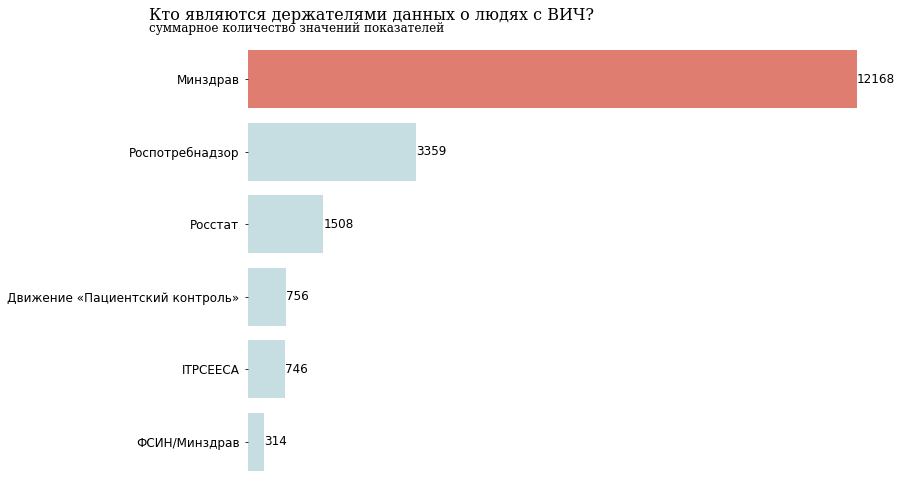

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))
#построим диаграмму барплот
sns.barplot(x='indicator_value', y='source', data=sources, palette=colors)

# Определяем цвета
colors = ['#c1e0e6' if value < sources['indicator_value'].max() else '#f26e5e' for value in sources['indicator_value']]

# Заголовок
plt.figtext(0.01, 0.92,'Кто являются держателями данных о людях с ВИЧ?', fontsize=16,family='serif')

# Подзаголовок
plt.figtext(0.01, 0.90, 'cуммарное количество значений показателей', fontsize=12, family='serif')

# Убираем названия осей
ax.set_xlabel('')
ax.set_ylabel('')

# Убираем рамку
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
# Убираем значения на оси X
ax.set_xticks([])

# Настройка отступов и границ
ax.margins(x=0.1)
ax.tick_params(axis='both', which='major', pad=5)

# Подписываем значения у каждой категории с увеличенным отступом
offset = 0.5  # Увеличиваем отступ
for index, value in enumerate(sources['indicator_value']):
    plt.text(value + offset, index, str(value), fontsize=12, va='center')  # Увеличиваем размер шрифта
    
# Увеличиваем размер шрифта у подписей категорий
plt.yticks(fontsize=12)  # Устанавливаем размер шрифта для подписей категорий
# Показать график
plt.show()